# Source code for DP2 Project
# Yelp reviews dataset
## Team Q
#### Team members:
#### Nurzhanat Zhussup, Philipp Meissner, Markus Grain

## Setup spark and import libraries

#### Important!

**If you are willing to run this code, please make sure to paste your own path to spark in `findspark.init(...)` and configure the `SparkSession` according to your own preferences**

In [1]:
unexpected_error = "Unexpected error: "
try:
    import sys
    print("Installing libraries...")
    !{sys.executable} -m pip install pyspark --no-cache-dir --quiet
    !{sys.executable} -m pip install findspark --no-cache-dir --quiet
except Exception as e:
    print(unexpected_error,e)

try:
    print("Importing libraries...")
    import logging
    import findspark
    from pyspark.sql import SparkSession
except Exception as e:
    print(unexpected_error,e)

try:
    print("Defining Spark...")
    findspark.init("/Users/ibragimzhussup/Desktop/Python/Apache Spark/spark-3.5.0-bin-hadoop3")
 
    spark = SparkSession.builder \
       .master("local[*]") \
       .appName("TeamQ_Project") \
       .config("spark.executor.memory", "14gb") \
       .config("spark.ui.showConsoleProgress", "false") \
       .getOrCreate()
    
    sc = spark.sparkContext
except Exception as e:
    print(unexpected_error, e)

print("Successful!")

Installing libraries...
Importing libraries...
Defining Spark...


24/02/10 15:22:53 WARN Utils: Your hostname, MacBook-Pro-G.local resolves to a loopback address: 127.0.0.1; using 192.168.100.6 instead (on interface en0)
24/02/10 15:22:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/10 15:22:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Successful!


In [2]:
spark

## Data import and data info delivery

**To handle such big amount of data, we will limit our dataset to 1.000.000 rows. Initial dataset has approximately 8.000.000 rows. We do it because of our limitations of the computational resources. The code also works perfectly without limitation.**

**Disclaimer!** 

**All the visual interpretations and models' accuracies are based on the 1.000.000 rows dataset. Setting off or changing the dataset limitations may lead to different visuals and accuracy values of the models'**

In [3]:
try:
    print("Loading data...")
    # Import data with information about the business
    business_meta = spark.read.json('./data/yelp_academic_dataset_business.json')
    # Import reviews data
    reviews = spark.read.json('./data/yelp_academic_dataset_review.json').limit(1000000)
except Exception as e:
    print(unexpected_error,e)

print("Successful!")

Loading data...


24/02/10 15:23:07 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Successful!


# Purpose of the project

The project aims to develop 2 recommender algorithms for Yelp:

1. **Content-Based Recommender (NLP):**
   - Create a personalized recommendation system using NLP sentiment prediction models.
   - Improve review evaluation efficiency and provide tailored suggestions based on textual content.

2. **Collaborative Filtering Recommender (ALS):**
   - Implement collaborative filtering with the ALS algorithm for user-item interaction analysis.
   - Enhance recommendations by identifying patterns and similarities among users and businesses.


Building a recommender algorithm is crucial for Yelp's success. It enhances user experience by providing personalized suggestions, increasing engagement, and optimizing revenue through targeted advertising. This technology not only sets Yelp apart in a competitive market but also offers valuable data-driven insights and ensures ethical data usage, building trust with users.


# Reasons for classification as big data

Our project qualifies as big data based on the 5 Vs framework:

1. **Volume:**
   - The Yelp Open Dataset contains around 7 million reviews, representing a significant volume of data.

2. **Velocity:**
   - Continuous generation of reviews on Yelp demands real-time or near-real-time data processing.

3. **Variety:**
   - Diverse data types, including reviews, business metadata, and user interactions, require sophisticated processing.

4. **Veracity:**
   - Ensuring accuracy and reliability in user-generated content is a critical consideration for the project.

5. **Value:**
   - The project aims to extract valuable insights from the data to enhance Yelp's recommender system and user experience.


# Yelp Dataset

The Yelp dataset comprises several JSON files, each containing specific types of data. Here's a brief description of all datasets:

1. **business.json:**
   - Contains business data, including location, attributes, and categories.
   - Key fields include business_id, name, address, city, state, postal code, latitude, longitude, stars, review_count, is_open, attributes, categories, and hours.

2. **review.json:**
   - Contains full review text data, including user and business identifiers.
   - Key fields include review_id, user_id, business_id, stars, date, text, useful, funny, and cool.

3. **user.json:**
   - Contains user data, including user details, review counts, and compliments received.
   - Key fields include user_id, name, review_count, yelping_since, friends, useful, funny, cool, fans, elite years, average_stars, and various compliment categories.

4. **checkin.json:**
   - Records business check-ins with timestamps.
   - Key fields include business_id and date.

5. **tip.json:**
   - Contains tips written by users on businesses.
   - Key fields include text, date, compliment_count, business_id, and user_id.

6. **photo.json:**
   - Contains photo data with captions and classifications.
   - Key fields include photo_id, business_id, caption, and label.

For our project, we utilized the "reviews" and "business" datasets to build a recommender system. This selection focused on extracting insights from user reviews and business details to enhance Yelp's recommendation capabilities.


# Yelp Dataset Terms of Use (License) Summary

## Last Updated: July 7, 2023

- For academic use only.
- No commercial use without Yelp's consent.
- Users must not modify, share, or use data for competitive purposes.
- Yelp retains ownership; users indemnify Yelp.
- Data provided "as is"; Yelp disclaims liability.
- Limitation of liability: $50.00.
- Agreement governed by California law.
- Effective for 12 months, terminable by either party.



In [4]:
print(f"Number of rows in business_meta: {business_meta.count()}")
print(f"Number of rows in reviews: {reviews.count()}")

Number of rows in business_meta: 150346
Number of rows in reviews: 1000000


### Duplicates check

In [5]:
try:
    print("Checking for duplicates...")
    bm_dup = business_meta.exceptAll(business_meta.dropDuplicates()).count()
    rev_dup = reviews.exceptAll(reviews.dropDuplicates()).count()
    if bm_dup == 0:
        print("There are no duplicates in the business_meta dataset")
    else:
        print(f"There are {bm_dup} duplicated rows in the business_meta dataset")

    if rev_dup == 0:
        print("There are no duplicates in the reviews dataset")
    else:
        print(f"There are {rev_dup} duplicated rows in the reviews dataset")
        
except Exceptions as e:
    print(unexpected_error,e)

Checking for duplicates...


24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/02/10 15:24:36 WARN RowBasedKeyValueBatch: Calling spill() on

There are no duplicates in the business_meta dataset
There are no duplicates in the reviews dataset


In [6]:
#Drop the duplicates if there are any
if bm_dup != 0 or rev_dup != 0:
    business_meta = business_meta.dropDuplicates()
    reviews = reviews.dropDuplicates()

### Missing values check

In [7]:
# Import libraries for all pyspark sql functions and types
try:
    print("Importing spark functions and types...")
    from pyspark.sql.functions import *
    from pyspark.sql.types import *
    from pyspark.sql import functions as F
except Exception as e:
    print(unexpected_error, e)
print("Successful!") 

Importing spark functions and types...
Successful!


In [8]:
# For business_meta drop the unnecessary columns first
business_meta = business_meta.drop('_corrupt_record', 'attributes', 'hours', 'is_open')

In [9]:
business_meta.select([count(when(col(c).isNull(), c)).alias(c) for c in business_meta.columns]).show()

+-------+-----------+----------+----+--------+---------+----+-----------+------------+-----+-----+
|address|business_id|categories|city|latitude|longitude|name|postal_code|review_count|stars|state|
+-------+-----------+----------+----+--------+---------+----+-----------+------------+-----+-----+
|      0|          0|       103|   0|       0|        0|   0|          0|           0|    0|    0|
+-------+-----------+----------+----+--------+---------+----+-----------+------------+-----+-----+



**Business meta has 103 missing values in the catergories column but we will not drop them because we plan to filter this dataset by this column any way**

In [10]:
reviews.select([count(when(col(c).isNull(), c)).alias(c) for c in reviews.columns]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



**No missing values in the reviews dataset**

# SECTION 1

## Data preprocessing and exploratory data analysis (EDA)

### Business meta dataset

In [11]:
# Import libraries for visuals
try:
    print("Installing libraries...")
    !{sys.executable} -m pip install matplotlib --no-cache-dir --quiet
    !{sys.executable} -m pip install seaborn --no-cache-dir --quiet
except Exception as e:
    print(unexpected_error, e)

try:
    print("Importing libraries...")
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
except Exception as e:
    print(unexpected_error, e)
print("Successful!")

Installing libraries...
Importing libraries...
Successful!


In [12]:
print("Columns business_meta:\n")
for i,column in enumerate(business_meta.columns):
    print(f"Index: {i}\tColumn: {column}")

Columns business_meta:

Index: 0	Column: address
Index: 1	Column: business_id
Index: 2	Column: categories
Index: 3	Column: city
Index: 4	Column: latitude
Index: 5	Column: longitude
Index: 6	Column: name
Index: 7	Column: postal_code
Index: 8	Column: review_count
Index: 9	Column: stars
Index: 10	Column: state


**First we filter out our business data set to include only restaurants and bars**

**We will therefore leave only the businesses that contain the word "Restaurants" in the categories column**

In [13]:
business_meta = business_meta.filter(business_meta.categories.contains('Restaurants'))

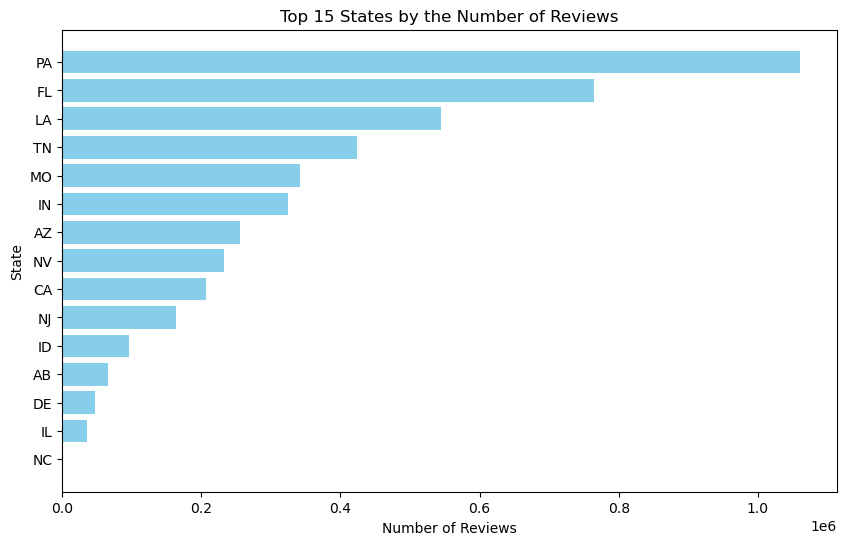

In [14]:
# Plot the number of reviews per state
state_reviews_plt = business_meta.groupBy('state') \
                                .agg(sum('review_count') \
                                .alias('sum_reviews')) \
                                .orderBy(asc('sum_reviews')) \
                                .tail(15)

states = [row['state'] for row in state_reviews_plt]
count_reviews = [row['sum_reviews'] for row in state_reviews_plt]

# Plotting
try:
    plt.figure(figsize=(10, 6))
    plt.barh(states, count_reviews, color='skyblue')
    plt.xlabel('Number of Reviews')
    plt.ylabel('State')
    plt.title('Top 15 States by the Number of Reviews')
except Exception as e:
    print(unexpected_error, e)

**Almost no reviews in following states: TX, CO, HI, WA, SD, NC**

**Top 5 most reviewed states: PA, FL, LA, TN, MO**

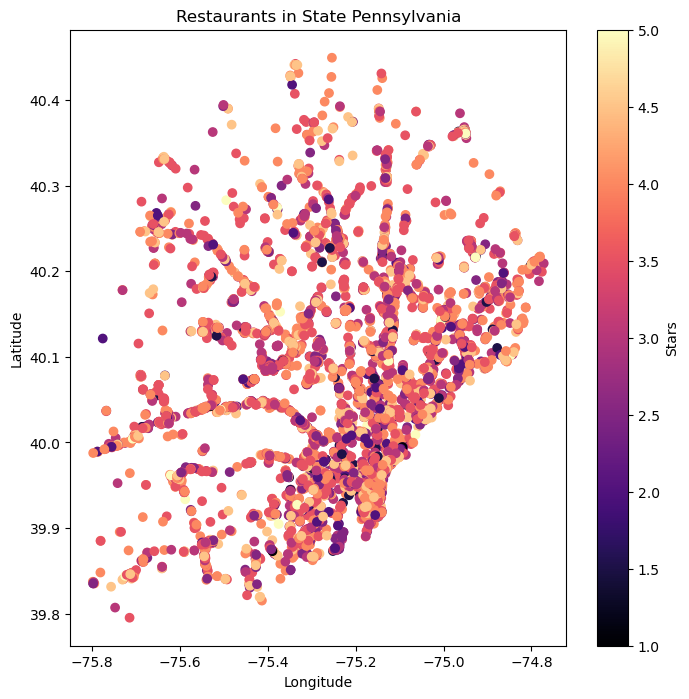

In [15]:
# Filter and sample the data using RDD transformations
try:
    filtered_data = (business_meta \
                     .filter((col('state') == 'PA') & (col('review_count') >= 20)) \
                     .select('longitude', 'latitude', 'stars') \
                     .rdd)

    # Extract coordinates and stars as lists
    longitude_list = filtered_data.map(lambda x: x['longitude']).collect()
    latitude_list = filtered_data.map(lambda x: x['latitude']).collect()
    stars_list = filtered_data.map(lambda x: x['stars']).collect()

    # Create the scatter plot
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(longitude_list, latitude_list, c=stars_list, cmap='magma')
    plt.title('Restaurants in State Pennsylvania')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Add legend
    legend = plt.colorbar(scatter)
    legend.set_label('Stars')
except Exception as e:
    print(unexpected_error,e)

# Distribution of ratings accross the state Pennsylvania

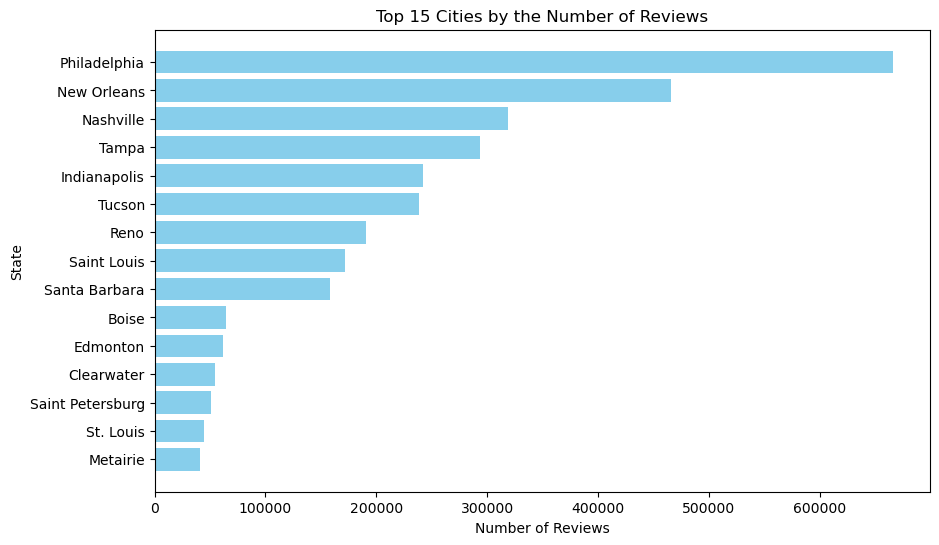

In [16]:
# Plot the number of reviews per city
city_stars_plt = business_meta.groupBy(col('city')) \
            .agg(sum(col('review_count')) \
            .alias('sum_reviews')) \
            .orderBy(asc('sum_reviews')) \
            .tail(15)
cities = [row['city'] for row in city_stars_plt]
count_stars = [row['sum_reviews'] for row in city_stars_plt]

# Plotting
try:
    plt.figure(figsize=(10, 6))
    plt.barh(cities, count_stars, color='skyblue')
    plt.xlabel('Number of Reviews')
    plt.ylabel('State')
    plt.title('Top 15 Cities by the Number of Reviews')
except Exception as e:
    print(unexpected_error,e)

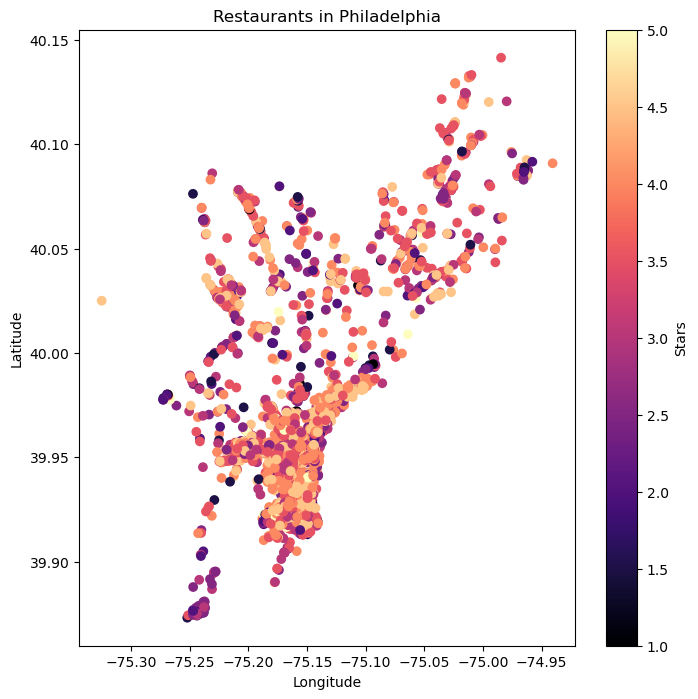

In [17]:
# Filter and sample the data using RDD transformations
try:
    filtered_data = (business_meta
                     .filter((col('city') == 'Philadelphia') & (col('categories').like('%Restaurants%')) & (col('review_count') >= 20))
                     .select('longitude', 'latitude', 'stars')
                     .rdd)
    
    # Extract coordinates and stars as lists
    longitude_list = filtered_data.map(lambda x: x['longitude']).collect()
    latitude_list = filtered_data.map(lambda x: x['latitude']).collect()
    stars_list = filtered_data.map(lambda x: x['stars']).collect()
    
    # Create the scatter plot
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(longitude_list, latitude_list, c=stars_list, cmap='magma')
    plt.title('Restaurants in Philadelphia')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Add legend
    legend = plt.colorbar(scatter)
    legend.set_label('Stars')
except Exception as e:
    print(unexpected_error, e)

# Distribution of restaurant ratings accross the city Philadelphia

The restaurants in the area of long= -75.15, lat= 39.93 tend to be the best rated restaurants.

The restaurants around the city centre tend to be worst rated restaurants

### Reviews dataset

In [18]:
#Info about the reviews data.
reviews.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [19]:
reviews.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

**The dataset has correct data types for each column!**

First we will filter out the reviews that are not "restaurants related".

To do so, we will join our reviews dataset with business_meta dataset on business_id

In [20]:
#Drop unnecessary columns in business_meta
try:
    print('Joining the tables...')
    business_meta = business_meta.select('business_id', 'name', 'address', 
                                         'city', 'stars', 'categories', 
                                         'longitude','latitude').withColumnRenamed('stars', 'restaurant_stars')
    
    reviews = reviews.join(business_meta, on='business_id', how='inner')
except Exception as e:
    print(unexpected_error,e)

print(f"Number of rows in reviews: {reviews.count()}")

Joining the tables...
Number of rows in reviews: 689501


We will do some feature extraction from the date column

We will extract:

- date
- year
- month
- day
- hour

In [21]:
#Convert to type timestamp
reviews = reviews.withColumn('timestamp', to_timestamp(col('date')))
#Extract the date column from timestamp
reviews = reviews.withColumn('date', to_date(col('timestamp')))

#Extract...
#Year
reviews = reviews.withColumn('year', year('timestamp'))
#Month
reviews = reviews.withColumn('month', month('timestamp'))
#Day
reviews = reviews.withColumn('day', dayofweek('timestamp'))
#Hour
reviews = reviews.withColumn('hour', hour('timestamp'))

In [22]:
reviews.show(1,vertical =True)

-RECORD 0--------------------------------
 business_id      | --hF_3v1JmU9nlu4z... 
 cool             | 0                    
 date             | 2021-10-15           
 funny            | 0                    
 review_id        | hACMz-Hp2gOdubrbe... 
 stars            | 4.0                  
 text             | Really excited to... 
 useful           | 1                    
 user_id          | FcU-db6VAz51b1_79... 
 name             | Green District Sa... 
 address          | 28 Monument Cir      
 city             | Indianapolis         
 restaurant_stars | 4.5                  
 categories       | Vegetarian, Resta... 
 longitude        | -86.1583509          
 latitude         | 39.7678876           
 timestamp        | 2021-10-15 16:09:29  
 year             | 2021                 
 month            | 10                   
 day              | 6                    
 hour             | 16                   
only showing top 1 row



Plotting the visuals...


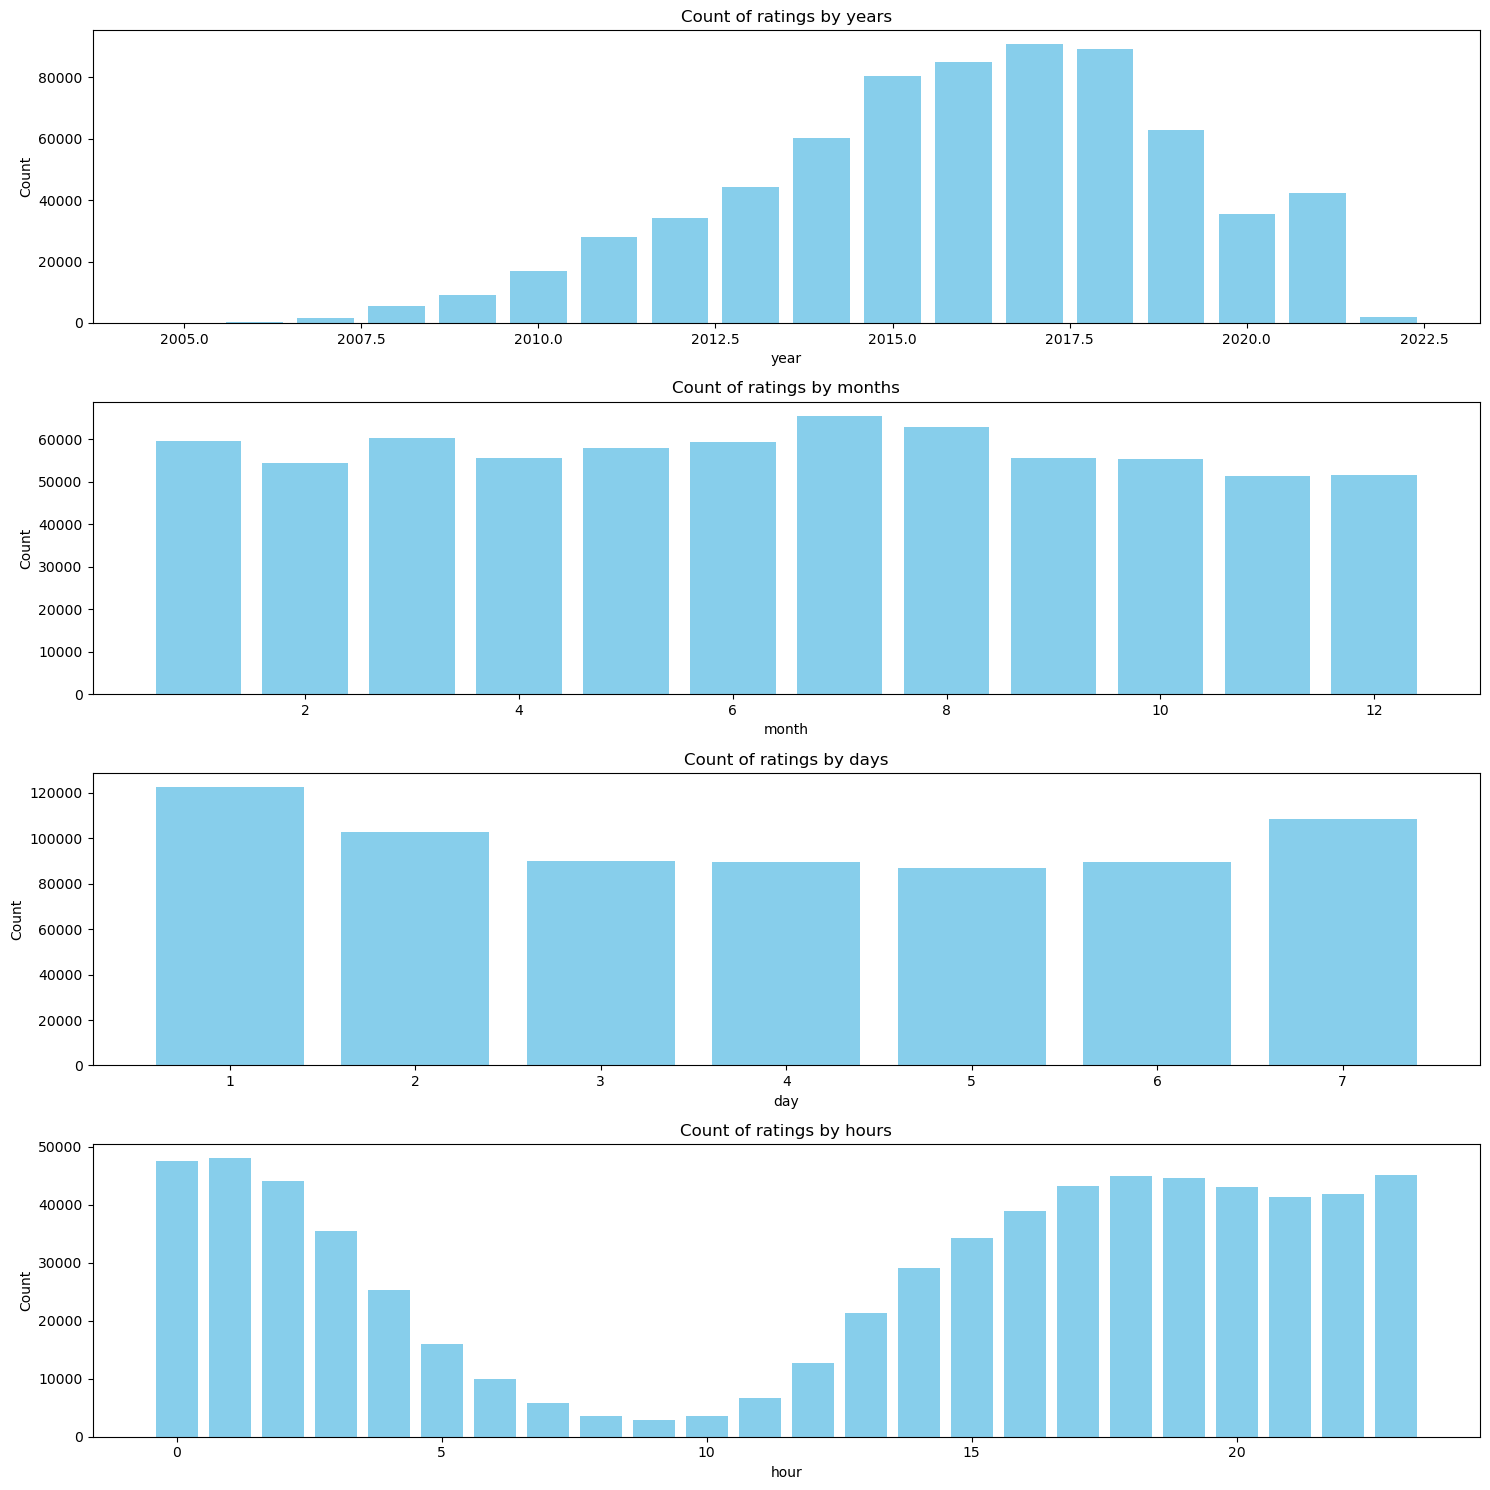

In [23]:
try:
    print("Plotting the visuals...")
    
    date_columns = ['year', 'month', 'day', 'hour']
    
    # Create subplots
    fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
    
    # Iterate over date columns
    for i, name in enumerate(date_columns):
        # Group by the date column and aggregate the count
        count_data = (reviews
                      .groupBy(name)
                      .agg(count(col('stars')).alias('count_stars'))
                      .select(name, 'count_stars')
                      .sort(name)
                      .rdd)
    
        # Extract data as lists
        x_values = count_data.map(lambda x: x[name]).collect()
        y_values = count_data.map(lambda x: x['count_stars']).collect()
    
        # Create a bar plot using matplotlib
        ax[i].bar(x_values, y_values, color='skyblue')
        #sns.barplot(x=x_values, y=y_values, ax=ax[i])
        ax[i].set_title(f"Count of ratings by {name}s")
        ax[i].set_xlabel(name)
        ax[i].set_ylabel('Count')
    
    # Adjust layout
    fig.tight_layout()

except Exception as e:
    print(unexpected_error, e)

#Plot the count of ratings by years, months, days and hours

- Years:
  
    Yelp has gained more users throughout the years.
- Months:
  
    No clear seasonality, but seem to have more reviews on summer times.
- Days:
  
    On avarage, there are more reviews on Mondays 
- Hours:

    Clear trend that there are significantly less reviews in the hours range from 4:00 to 13:00.

**Because we have limited capabilites, we will filter out our dataset to just one city and we will be building our model on restaurant reviews of this one city. This also should in theory imporve our accuracy in predictions. The city we will be using for our model is the city with the most amount of reviews which is** *Philadelphia*

In [24]:
try:
    reviews = reviews.filter(col('city')=='Philadelphia')
    reviews.show(1, vertical=True)
    print(f"Number of rows in reviews: {reviews.count()}")
except Exception as e:
    print(unexpected_error, e)

-RECORD 0--------------------------------
 business_id      | Ryt1Fhgz7sixMQSJi... 
 cool             | 0                    
 date             | 2012-04-30           
 funny            | 1                    
 review_id        | Wqjq2RoYNvLuP1DFu... 
 stars            | 2.0                  
 text             | I remember when t... 
 useful           | 1                    
 user_id          | _R-xEEF119h1faZ2x... 
 name             | Zocalo               
 address          | 3600 Lancaster Ave   
 city             | Philadelphia         
 restaurant_stars | 2.5                  
 categories       | Restaurants, Mexican 
 longitude        | -75.1938661          
 latitude         | 39.9584222           
 timestamp        | 2012-04-30 11:42:58  
 year             | 2012                 
 month            | 4                    
 day              | 2                    
 hour             | 11                   
only showing top 1 row

Number of rows in reviews: 109595


### EDA for final filtered dataset

**We filtered the dataset to have only:**

- **city = Philadelphia**
- **category = Restaurants**

**1st plot: Distribution of stars in Philadelphia**

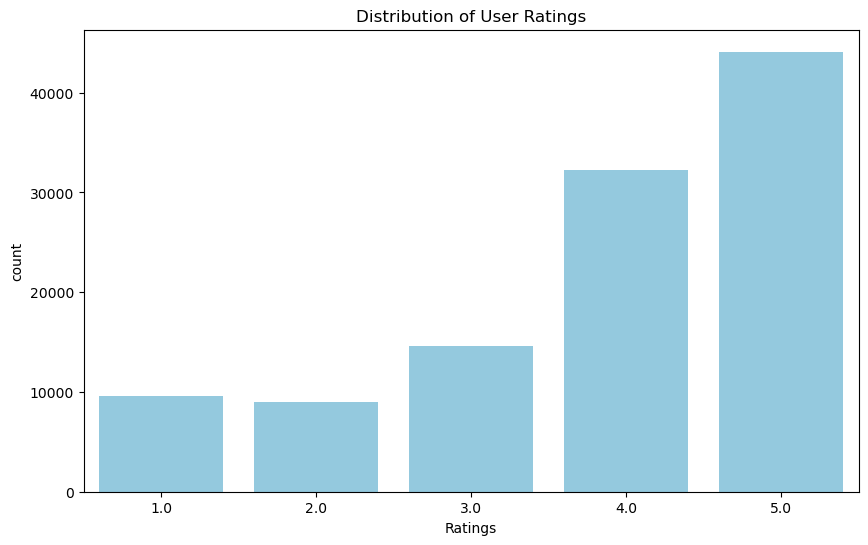

In [25]:
try:
#Extract the users' ratings from reviews
    philly_stars = reviews.select(col('stars')).collect()
    philly_stars = [star[0] for star in philly_stars]
except Exception as e:
    print(unexpected_error, e)

# Plotting
try:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=np.array(philly_stars), color='skyblue')
    plt.xlabel('Ratings')
    plt.title('Distribution of User Ratings')
except Exception as e:
    print(f"Unexpected error: {e}")

**2nd plot: Distribution of retaurant ratings in Philadelphia**

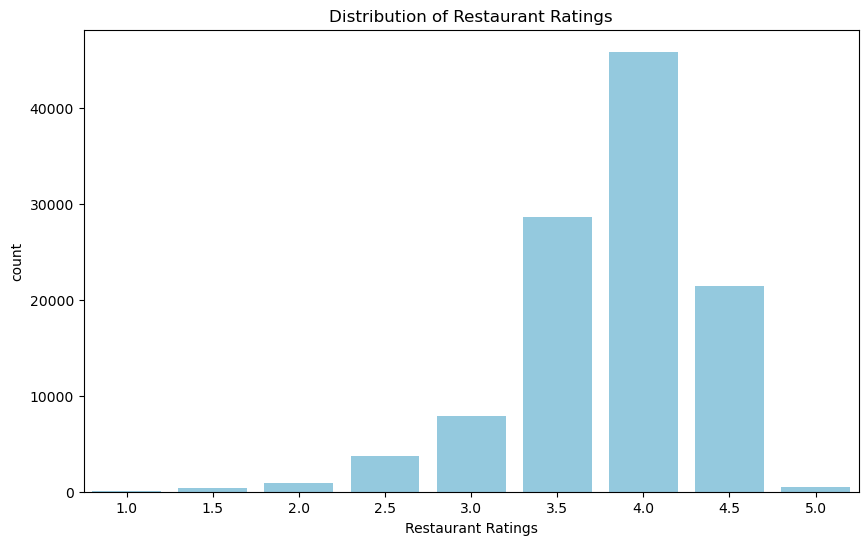

In [26]:
try:
#Extract the users' ratings from reviews
    philly_rest_stars = reviews.select(col('restaurant_stars')).collect()
    philly_rest_stars = [star[0] for star in philly_rest_stars]
except Exception as e:
    print(unexpected_error, e)

# Plotting
try:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=np.array(philly_rest_stars), color='skyblue')
    plt.xlabel('Restaurant Ratings')
    plt.title('Distribution of Restaurant Ratings')
except Exception as e:
    print(f"Unexpected error: {e}")

**3rd plot: Wordcloud of categories**

In [27]:
#Install necessary library
try:
    print("Installing library...")
    !{sys.executable} -m pip install wordcloud --no-cache-dir --quiet
    print("Successfully installed!")
except Exception as e:
    print(unexpected_error,e)
    

Installing library...


In [28]:
#Retreive the restaurant categories
categories = reviews.select(col('categories')).dropna().collect()
categories = [cat[0] for cat in categories]
text = " ".join(cat for cat in categories)
text = text.replace('Restaurants','') \
           .replace('Food','') \
           .replace('Bars', '')

In [29]:
try:
    print("Importing libraries...")
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    print("Successful!")
except Exception as e:
    print(unexpected_error, e)

Importing libraries...
Successful!


In [30]:
wordcloud = WordCloud(background_color='white').generate(text)

(-0.5, 399.5, 199.5, -0.5)

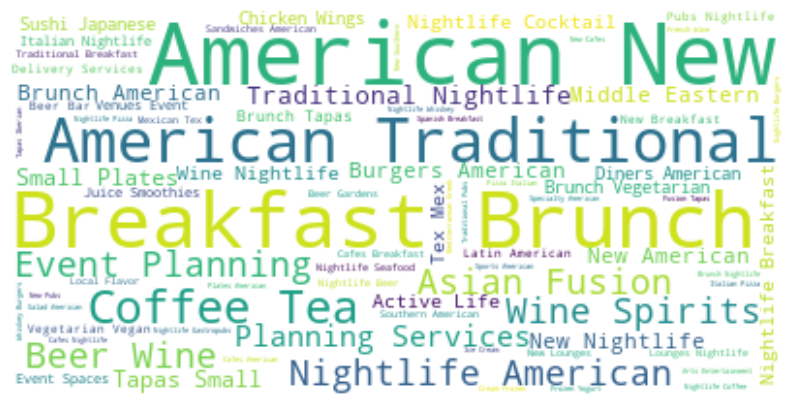

In [31]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

This visual shows which words are commen in the column.

The bigger the words is the more commen the word is in the column.

In [32]:
#Retreive the restaurant categories
user_text = reviews.select(col('text')).dropna().collect()
user_text = [txt[0] for txt in user_text]
text = " ".join(txt for txt in user_text)

In [33]:
wordcloud = WordCloud(background_color='white').generate(text)

(-0.5, 399.5, 199.5, -0.5)

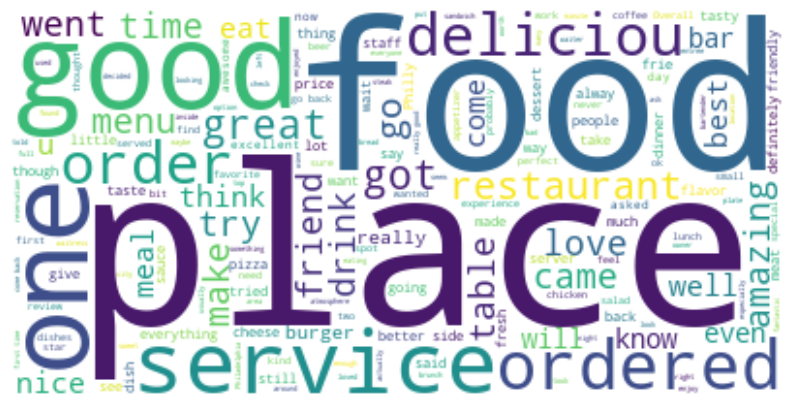

In [34]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# SECTION 2

# Recommendation Systems
# Explanation

## Introduction

Recommendation systems play a crucial role in helping users discover relevant and personalized content or products. These systems analyze user preferences and behaviors to suggest items that the user is likely to enjoy. There are several types of recommendation systems, each with its own approach to providing personalized recommendations.

## Types of Recommendation Systems

### 1. **Collaborative Filtering**

Collaborative filtering is based on the idea that users who agreed in the past tend to agree in the future. It can be further divided into two types:

   - **User-Based Collaborative Filtering:** Recommends items based on the preferences of users with similar tastes. If user A and user B have similar preferences and both like item X, the system will recommend item X to user A if user B has already liked it.

   - **Item-Based Collaborative Filtering:** Focuses on the similarities between items rather than users. If a user has liked item X, the system will recommend items similar to X based on the preferences of other users who liked X.

### 2. **Content-Based Filtering**

Content-based filtering recommends items similar to those a user has liked in the past. It relies on the characteristics of the items and the user's preferences. For example, in a movie recommendation system, if a user liked action movies in the past, the system will recommend other action movies.

### 3. **Hybrid Methods**

Hybrid methods combine collaborative filtering and content-based filtering to overcome the limitations of each approach. By leveraging both user preferences and item characteristics, hybrid recommendation systems aim to provide more accurate and diverse recommendations.

### 4. **Matrix Factorization**

Matrix factorization models represent user-item interactions as a matrix and decompose it into latent factors. This method is particularly effective when dealing with sparse matrices, where many user-item interactions are missing. Popular techniques include Singular Value Decomposition (SVD) and Alternating Least Squares (ALS).

### 5. **Deep Learning-based Recommendation Systems**

Deep learning models, such as neural collaborative filtering and recurrent neural networks, have been increasingly used for recommendation systems. These models can capture complex patterns and dependencies in user-item interactions, leading to more accurate recommendations.

## Conclusion

Choosing the right recommendation system depends on the nature of the application, the available data, and the specific requirements. Often, a combination of different techniques in hybrid models provides the best results, as it can leverage the strengths of multiple approaches.



**Source:**

Types of Recommendation Systems & Their Use Cases: https://medium.com/mlearning-ai/what-are-the-types-of-recommendation-systems-3487cbafa7c9

Deep Learning Based Recommender Systems: https://medium.com/sciforce/deep-learning-based-recommender-systems-b61a5ddd5456


## Data preprocessing for ML

**Cold Start Problem in ALS:**
The cold start problem in collaborative filtering, particularly with Alternating Least Squares (ALS), refers to the challenge of making accurate recommendations for new users or items with limited interaction history. Since ALS relies on past interactions to learn latent features, new users or items without sufficient data pose difficulties in making accurate predictions.

**Solution and Empirical Tests:**
To address the cold start problem, empirical tests were conducted. It was decided to filter out users who had less than 3 reviews. This approach aimed to exclude users with minimal interaction history, reducing the impact of the cold start problem.

**Empirical Validation:**
After implementing the filtering strategy, empirical tests were conducted to evaluate the impact on model accuracy. The Root Mean Squared Error (RMSE), a common metric for assessing recommendation system performance, was used.

The results of the tests demonstrated a substantial improvement. The RMSE, which was initially at 1.8, decreased to 1.36 after filtering out users with fewer than 3 reviews. This empirical evidence supported the effectiveness of the approach in mitigating the cold start problem and enhancing the accuracy of the ALS-based recommendation model.

**Reasons for data preprocessing:**

We've had 2 reasons for reducing the number of rows via filtering:

- Reducing the computational costs (running time)
- Increasing the model's accuracy

In [35]:
# Create a user_id count df which represents the number of review per user_id as each row is one review in our data
user_id_counts = reviews.select('user_id').groupBy('user_id').count()

# Define the user_ids for filtering
filtered_user_ids = user_id_counts.filter(col('count') >= 3).select('user_id')

# Filter out users who has less than 3 reviews
reviews = reviews.join(filtered_user_ids, on='user_id', how='inner')

Now we have filtered out the users with less than 3 reviews

In [36]:
for i,c in enumerate(reviews.columns):
    print(f"Index: {i}\tColumn: {c}")

Index: 0	Column: user_id
Index: 1	Column: business_id
Index: 2	Column: cool
Index: 3	Column: date
Index: 4	Column: funny
Index: 5	Column: review_id
Index: 6	Column: stars
Index: 7	Column: text
Index: 8	Column: useful
Index: 9	Column: name
Index: 10	Column: address
Index: 11	Column: city
Index: 12	Column: restaurant_stars
Index: 13	Column: categories
Index: 14	Column: longitude
Index: 15	Column: latitude
Index: 16	Column: timestamp
Index: 17	Column: year
Index: 18	Column: month
Index: 19	Column: day
Index: 20	Column: hour


Columns to drop in "reviews":

- cool
- funny
- date
- timestamp
- year
- month
- day
- hour

In [37]:
# Drop the unnecessary columns
try:
    reviews = reviews.drop('cool','funny','date','timestamp','year','month','day','hour')
except Exception as e:
    print(unexpected_error, e)

# Collaborative filtering
## ALS Recommender System

### Collaborative Filtering

Collaborative filtering is a technique used in recommendation systems where users' preferences and behaviors are analyzed to make predictions about items or products they might like. One popular algorithm for collaborative filtering is Alternating Least Squares (ALS).

### Alternating Least Squares (ALS)

ALS is a matrix factorization algorithm commonly employed in personalized recommendation scenarios, such as those encountered by e-commerce companies like Amazon and Netflix. In ALS, the user-item interaction matrix is factorized into two lower-rank matrices representing users and items. The optimization process alternates between fixing one matrix and optimizing the other, hence the name "Alternating Least Squares."

The optimization problem can be formulated as follows:

$$ \min_{X,Y} \sum_{(u,i) \in R} (r_{ui} - x_u^T y_i)^2 + \lambda (\|x_u\|_2^2 + \|y_i\|_2^2) $$

Here, $ R $ is the matrix of ratings, $ x_u $ is the vector summarizing user $u$, $ y_i $ is the vector summarizing item $ i $, and $ \lambda $ is the regularization factor.

The ALS algorithm iteratively updates the user and item vectors until convergence, solving the optimization problem through alternating updates.

### Evaluation Metrics

The recommendation system's performance is evaluated using off-line analysis, where a dataset is split into training and test sets. Common predictive accuracy metrics include:

- **Mean Absolute Error (MAE):**

$$ \text{MAE} = \frac{1}{|R|} \sum_{(u,i) \in R} |r_{ui} - p_{ui}| $$

- **Root Mean Squared Error (RMSE):**

$$ \text{RMSE} = \sqrt{\frac{\sum_{(u,i) \in R} (r_{ui} - p_{ui})^2}{|R|}} $$


These metrics help measure the accuracy and impact of the recommendation system on user choices.



**Source:**

Recommendation System for E-commerce using Alternating Least Squares (ALS) on Apache Spark (S. Gosh et al.): http://www.diva-portal.org/smash/get/diva2:1504620/FULLTEXT02.pdf

In [38]:
# Import necessary libraries for ALS
try:
    print("Importing...")
    from pyspark.ml.evaluation import RegressionEvaluator 
    from pyspark.ml.recommendation import ALS
    from pyspark.ml.feature import StringIndexer
    print("Successful!")
except Exception as e:
    print(f"Unexpected error: {e}")

Importing...
Successful!


**Because Apache Spark's ALS recommendation algorithm uses only integers as an input, we need to transfrom our user_id and business_id columns, because the values of these columns are the combination of strings and integers**

In [39]:
# Define a string indexer since the ALS takes only int as an input
indexer = StringIndexer(inputCols=['user_id', 'business_id'], outputCols=['user_indexed', 'business_indexed'])

# Transform the data and create 2 new indexed columns
try:
    print("Indexing...")
    reviews = indexer.fit(reviews).transform(reviews)
    print("Indexing was successful!")
except Exception as e:
    print(f"Unexpected error: {e}")

Indexing...
Indexing was successful!


**Split the data with 70/30 split ratio**

In [40]:
#Train test split with 70/30 split ratio

train_data, test_data = reviews.randomSplit([0.7,0.3])

## Define, train and evaluate the model

### Hyperparameters:

- **rank:**
    - Definition: The number of latent factors in the matrix factorization.
    - Explanation: rank determines the dimensionality of the user and item vectors. A higher rank allows the model to capture more complex patterns but may lead to overfitting.
- **maxIter:**
    - Definition: The maximum number of iterations the ALS algorithm will run.
    - Explanation: maxIter controls the number of iterations the ALS algorithm performs to optimize the factorized matrices. Increasing this may improve model convergence but also increases computation time.
- **implicitPrefs:**
    - Definition: Specifies whether to treat the ratings as implicit feedback (e.g., binary data indicating user interactions) or explicit feedback (actual ratings).
    - Explanation: If implicitPrefs is set to True, the model considers ratings as implicit feedback, influencing how the optimization problem is formulated.
- **regParam:**
    - Definition: Regularization parameter $\lambda$ for preventing overfitting.
    - Explanation: regParam helps control the trade-off between fitting the data well and preventing overfitting. A higher value penalizes large coefficients, reducing overfitting.
- **nonnegative:**
    - Definition: Specifies whether to enforce non-negativity constraints on the user and item factors.
    - Explanation: If set to True, the model ensures that the learned factors are non-negative. This is useful in scenarios where negative factors might not have meaningful interpretations.
- **userCol, itemCol, ratingCol:**
    - Definition: Columns specifying user, item, and rating information in the input DataFrame.
    - Explanation: These parameters define the names of the columns in the input DataFrame that represent user IDs, item IDs, and ratings, respectively. Our inputs will be: user_indexed, business_indexed, stars.
- **coldStartStrategy:**
    - Definition: Strategy to handle unknown or new users/items during prediction (options: 'nan', 'drop').
    - Explanation: If set to 'drop', the strategy discards rows with missing user or item information during prediction. This helps handle cold-start problems where the model encounters new users or items not seen during training.

**To find the best hyperparameters for ALS in PySpark, we can perform hyperparameter tuning using techniques like Grid Search or Random Search along with cross-validation. Use the `ParamGridBuilder` and `CrossValidator` classes from PySpark's `pyspark.ml.tuning` module. This involves specifying a grid of hyperparameter values, setting up an evaluation metric, and then letting the cross-validator search for the best combination of hyperparameters.**

**But as previously mentioned, we have very small resources to do such cross-validation. Therefore, we will choose our hyperparameters based on our intuition :)**

In [41]:
als = ALS(rank = 25,
          maxIter=10, 
          implicitPrefs=False,
          regParam=0.05, 
          nonnegative=True,
          userCol="user_indexed", 
          itemCol="business_indexed", 
          ratingCol="stars",
          coldStartStrategy='drop',
         )

In [42]:
#Fit the model
import time

try:
    start_time = time.time()
    print("Fitting the model...")
    model = als.fit(train_data)
    end_time = time.time()

    print("The model was fitted successfully!")
    print("Took {} seconds for training.".format(end_time - start_time))
    
except Exception as e:
    print(f"Unexpected error: {e}")

Fitting the model...


24/02/10 15:33:27 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


The model was fitted successfully!
Took 111.66688323020935 seconds for training.


In [43]:
try:
    print("Predicting...")
    predictions = model.transform(test_data)
    # predictions = predictions.withColumn("prediction", col("prediction").clip(0, 5))
    print("Calculating RMSE...")
    eval = RegressionEvaluator(metricName='rmse', labelCol='stars', predictionCol='prediction')
    print(f"RMSE: {eval.evaluate(predictions)}")
    print("Calculating MAE")
    eval = RegressionEvaluator(metricName='mae', labelCol='stars', predictionCol='prediction')
    print(f"MAE: {eval.evaluate(predictions)}")

except Exception as e:
    print(unexpected_error, e)

Predicting...
Calculating RMSE...
RMSE: 1.3799914251083996
Calculating MAE
MAE: 1.0968773123066304


## Make recommendations for users and display the businesses

**There's a option to recommend for all users. But in order to investigate the predictions we will predict for 3 persons and have a closer look at them**

We will recommend 5 restaurants for each user and manually see if they seem to correlate with other rated restaurants

In [44]:
users = [1,2,3]
recommend_df = spark.createDataFrame([(user_index,) for user_index in users], ["user_indexed"])

recommend_df = model.recommendForUserSubset(recommend_df, numItems=5) 
recommend_df = recommend_df.select("user_indexed",
                                            explode("recommendations") \
                                            .alias("recommendation"))
recommend_df = recommend_df.select(
    col("user_indexed"),
    col("recommendation.business_indexed").alias("business_indexed"),
    col("recommendation.rating").alias("forecasted_rating"))

business_info = reviews.select('name', 'address', 'categories', 'business_indexed', 'latitude','longitude')
recommend_df = recommend_df.join(business_info, on='business_indexed', how='left')

### Recommendations for users 1,2,3

In [45]:
recommend_df.dropDuplicates() \
            .select('user_indexed', 'business_indexed','forecasted_rating','name', 'address','categories') \
            .orderBy(col('user_indexed').asc()) \
            .show()

+------------+----------------+-----------------+--------------------+--------------------+--------------------+
|user_indexed|business_indexed|forecasted_rating|                name|             address|          categories|
+------------+----------------+-----------------+--------------------+--------------------+--------------------+
|           1|             898|        6.0599084|Mayura Indian Res...|9321-23 Krewstown Rd|Indian, Food, Sou...|
|           1|             748|         6.195888| First Street Steaks|     1204 N Front St|Breakfast & Brunc...|
|           1|             760|         6.269644|       Captain Hooks|     2226 N Broad St|Seafood Markets, ...|
|           1|             702|        6.5451627|          Green Soul|     7169 Ogontz Ave|Sandwiches, Soul ...|
|           1|             786|         6.172614|      Carangi Baking| 2655 S Iseminger St|Bakeries, Cafes, ...|
|           2|             579|         5.834625|           Cafe Nhan| 1606 W Passyunk Ave|Resta

### Actual reviews of users 1,2,3

In [46]:
reviews.filter(col('user_indexed').isin(users)) \
                                  .select('user_indexed', 'business_indexed', 'stars','name','categories') \
                                  .dropDuplicates() \
                                  .show()

+------------+----------------+-----+--------------------+--------------------+
|user_indexed|business_indexed|stars|                name|          categories|
+------------+----------------+-----+--------------------+--------------------+
|         3.0|            23.0|  5.0|           Marrakesh|Restaurants, Medi...|
|         3.0|           144.0|  4.0|                 BAP| Korean, Restaurants|
|         3.0|            64.0|  5.0|           Mood Cafe|Cafes, Pakistani,...|
|         3.0|             4.0|  4.0|              Penang|Malaysian, Asian ...|
|         3.0|           162.0|  3.0|            Wishbone|Thai, Restaurants...|
|         3.0|            38.0|  5.0|     Zorba's Taverna|Restaurants, Gree...|
|         3.0|           286.0|  4.0|         Queen Sheba|Nightlife, Restau...|
|         3.0|           131.0|  5.0|J'aime French Bakery|Food, Juice Bars ...|
|         3.0|           115.0|  3.0|       Allegro Pizza|Sandwiches, Resta...|
|         3.0|            24.0|  5.0|   

### Recommendation process expalined:

The users 1,2,3 got these recommendations because other users that have similar tastes as these users, have rated these restaurants with probably 5 stars.

# SECTION 3

## Sentiment Analysis

In [47]:
#Install necessary libraries
try:
    print("Installing libraries...")
    !{sys.executable} -m pip install textblob --no-cache-dir --quiet
    !{sys.executable} -m pip install nltk --no-cache-dir --quiet
    print("Successfully installed!")
except Exception as e:
    print(unexpected_error,e)

Installing libraries...


In [48]:
#Import libraries
try:
    print("Importing libraries...")
    from textblob import TextBlob
    import nltk
    from pyspark.sql import functions as F
    print("Successful!")
except Exception as e:
    print(unexpected_error, e)

Importing libraries...
Successful!


**First we will check how the TextBlob library works in practice!**

For this we create 3 types of texts positive, negative and neutral and we'll see the difference in Polarity of these 3 texts.

In [49]:
positive_text = "The food was absolutely amazing"
negative_text = "The food was very horrible"
neutral_text = "This is a mexican restaurant"
positive_blob = TextBlob(positive_text).sentiment[0]
negative_blob = TextBlob(negative_text).sentiment[0]
neutral_blob = TextBlob(neutral_text).sentiment[0]
print(f"Polarity of positive text: {positive_blob}\nPolarity of negative text: {negative_blob}\nPolarity of neutral text: {neutral_blob}")

Polarity of positive text: 0.6000000000000001
Polarity of negative text: -1.0
Polarity of neutral text: 0.0


Polarity of the text ranges between -1 to 1:

Polarity range of:

- [-1:0): Means the text is negative
- (0:1]: Means the text is positive
- Exactly 0: Means the text is neutral

In [50]:
# Define polarity detection function
def polarity_detection(text):
    return TextBlob(text).sentiment.polarity

# Define subjectivity detection function
def subjectivity_detection(text):
    return TextBlob(text).sentiment.subjectivity

# Define text classification function
def text_classification(words):
    # Polarity detection
    polarity_detection_udf = udf(polarity_detection, StringType())
    words = words.withColumn("polarity", polarity_detection_udf("text"))

    # Subjectivity detection
    subjectivity_detection_udf = udf(subjectivity_detection, StringType())
    words = words.withColumn("subjectivity", subjectivity_detection_udf("text"))

    return words

# Define preprocessing function
def preprocessing(lines):
    words = lines.select('text')

    words = words.na.replace('', None)
    words = words.withColumn('text', F.regexp_replace('text', r'http\S+', ''))
    words = words.withColumn('text', F.regexp_replace('text', '@\w+', ''))
    words = words.withColumn('text', F.regexp_replace('text', '#', ''))
    words = words.withColumn('text', F.regexp_replace('text', ':', ''))
    words = words.withColumn('text', F.regexp_replace('text', r'\n', ''))
    words = words.withColumn('text', F.regexp_replace('text', r'\*', ''))
    words = words.na.drop()

    return words

# Define sentiment classification function
def sentiment_class(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

#### TextBlob library application

In [51]:
try:
    text_df = reviews.select('text')
    # Apply preprocessing
    text_df = preprocessing(text_df)
    
    # Apply sentiment analysis
    text_df = text_classification(text_df)
    
    # Classify sentiment
    sentiment_class_udf = udf(sentiment_class, StringType())
    text_df = text_df.withColumn("sentiment", sentiment_class_udf("polarity"))
    
    # Show the resulting DataFrame
    text_df.show()

except Exception as e:
    print(unexpected_error,e)


+--------------------+--------------------+-------------------+---------+
|                text|            polarity|       subjectivity|sentiment|
+--------------------+--------------------+-------------------+---------+
|I've never actual...| 0.14715956558061824| 0.4969507101086049| positive|
|The only good thi...|0.031060606060606063| 0.5678030303030303| positive|
|I'm pretty sure t...|  0.2196969696969697| 0.6434343434343434| positive|
|Please just do it...|                 0.2| 0.6297202797202798| positive|
|This was my first...| 0.31249999999999994| 0.6416666666666666| positive|
|There is a bunch ...|  0.7775000000000001| 0.6825000000000001| positive|
|So much food!  Am...| 0.15357142857142855| 0.5253246753246754| positive|
|Here is where you...|  0.3178571428571429| 0.6357142857142856| positive|
|What's so great a...| 0.31875000000000003| 0.5026041666666665| positive|
|Khyber and I have...|  0.3409090909090909|0.49090909090909085| positive|
|If your looking f...|              0.

## Distribution of the Sentiment

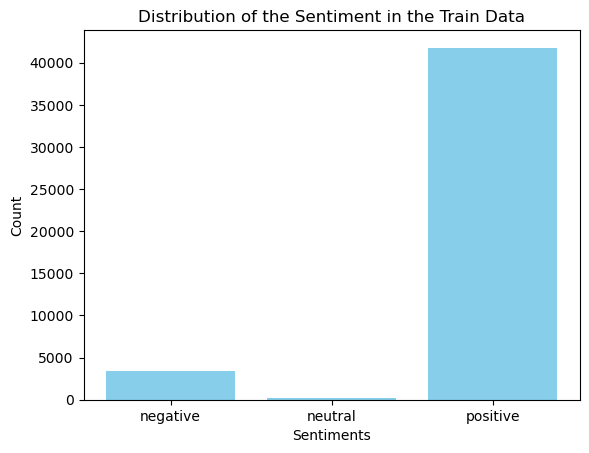

In [52]:
# First split the data into train and test

train_data, test_data = text_df.randomSplit([.9,.1])

# Then check the distribution of the sentiment in the train data
try:

    # Group and extract data
    sentiment_counts = train_data.groupBy('sentiment').count().orderBy('sentiment')
    sentiment_counts_collect = sentiment_counts.collect()
    
    sentiments = [row['sentiment'] for row in sentiment_counts_collect]
    counts = [row['count'] for row in sentiment_counts_collect]

    # Create bar plot
    plt.bar(x=sentiments, height=counts, color='skyblue')
    plt.title('Distribution of the Sentiment in the Train Data')
    plt.xlabel('Sentiments')
    plt.ylabel('Count')

except Exception as e:
    print(unexpected_error,e)

**Because that our sentiment distribution is so uneven, we will sample our data manually to have equal amount of positive and negative sentiments**

In [53]:
sentiment_counts_collect

[Row(sentiment='negative', count=3377),
 Row(sentiment='neutral', count=196),
 Row(sentiment='positive', count=41787)]

**We will use approximately 800-1000 rows for our NLP task to reduce the running time.**

**So we'll sample out approx. 300 negative and 300 positive and 30 neutral sentiments for train data**

In [54]:
# Create a for loop to extract the count of sentiments
for row in sentiment_counts_collect:
    if row.sentiment == 'negative':
        negative_count = row['count']
    elif row.sentiment == 'positive':
        positive_count = row['count']
    elif row.sentiment == 'neutral':
        neutral_count = row['count']
    else:
        break

# Define the fractions
train_negative_fraction = 300/negative_count
train_positive_fraction = 300/positive_count
train_neutral_fraction = 30/neutral_count
# Filter out the train data
train_data = train_data.filter((col("sentiment") == "negative") | (col("sentiment") == "positive") | (col("sentiment") == "neutral")) \
                    .sampleBy("sentiment", fractions={"negative": train_negative_fraction, "positive": train_positive_fraction, "neutral": train_neutral_fraction}, seed=42)

In [55]:
train_data.groupby('sentiment').count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
| positive|  305|
|  neutral|   25|
| negative|  311|
+---------+-----+



**To ensure the real accuracy of our models we will also do approximately same distribution of the sentiments for our test data**

**We'll sample out approx. 100 negative and 150 positive and 10 neutral sentiments for train data**

In [56]:
# Check the number of rows of the test data
test_sentiment_counts_collect = test_data.groupBy('sentiment').count().orderBy('sentiment').collect()
test_sentiment_counts_collect

[Row(sentiment='negative', count=353),
 Row(sentiment='neutral', count=21),
 Row(sentiment='positive', count=4641)]

In [57]:
# Create a for loop to extract the count of sentiments
for row in test_sentiment_counts_collect:
    if row.sentiment == 'negative':
        test_negative_count = row['count']
    elif row.sentiment == 'positive':
        test_positive_count = row['count']
    elif row.sentiment == 'neutral':
        test_neutral_count = row['count']
    else:
        break

# Define the fractions
test_negative_fraction = 100/test_negative_count
test_positive_fraction = 150/test_positive_count
test_neutral_fraction = 10/test_neutral_count

# Randomly sample 100 positive and 100 negative and 10 neutral texts to accurately evaluate our model
test_data = test_data.filter((col("sentiment") == "negative") | (col("sentiment") == "positive") | (col("sentiment") == "neutral")) \
                    .sampleBy("sentiment", fractions={"negative": test_negative_fraction, "positive": test_positive_fraction, "neutral": test_neutral_fraction}, seed=42)

In [58]:
test_data.groupby('sentiment').count().show()

+---------+-----+
|sentiment|count|
+---------+-----+
| positive|  159|
|  neutral|    9|
| negative|   99|
+---------+-----+



# SECTION 4

# Content-based filtering

## Content-Based Filtering:

Content-based filtering is a recommendation system technique that relies on the intrinsic characteristics of items and a user's preferences to make recommendations. In the context of text sentiment classification, content-based filtering involves analyzing the textual content of items (e.g., reviews) and using this information to understand user preferences and make predictions.


## Pyspark Classification Algorithms Comparison:

For sentiment analysis in restaurant reviews, we are comparing various classification algorithms available in Pyspark. These algorithms include:
- Multilayer Perceptron Classifier
- Naive Bayes
- Logistic Regression
- Random Forest
- Decision Tree

### The Possibility for Model Tuning:

To ensure optimal performance, it would be very benefitial to tune these models using n-fold cross-validation. But, because of the limited capacities of the computational resources, we won't be performing a n-fold cross-validation.

In summary, the selection of the best classification model will be based on a comparison of their final test accuracy score.

In [59]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, StopWordsRemover, StringIndexer
from pyspark.ml import Pipeline

print("Step 1: Text preprocessing")

# Step 1
# Tokenize the input text
tokenizer = Tokenizer(inputCol="text", outputCol="words")
# Remove stopwords from the tokenized words
stopwords_remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="filtered_words", locale="en_US")
# Apply HashingTF to convert the tokenized words into raw features
hashing_tf = HashingTF(inputCol=stopwords_remover.getOutputCol(), outputCol="raw_features", numFeatures=20)
# Apply IDF to transform the raw features into TF-IDF features
idf = IDF(inputCol=hashing_tf.getOutputCol(), outputCol="features")
# Encode the sentiment labels into numerical values
label_encoder = StringIndexer(inputCol="sentiment", outputCol="label")

print("Step 2: Data preprocessing")
# Step 2 
train_data = train_data.select("text", "sentiment")
test_data = test_data.select("text", "sentiment")

print("Step 3: Pipeline...")
# Step 3
preproc = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, label_encoder])
# preproc = Pipeline(stages=[tokenizer, hashing_tf, idf, label_encoder])
preproc_pipeline = preproc.fit(train_data)

train_data_transformed = preproc_pipeline.transform(train_data)
test_data_transformed = preproc_pipeline.transform(test_data)

print("Completed!")

train_data_transformed.select('sentiment', 'label').distinct().show()

Step 1: Text preprocessing
Step 2: Data preprocessing
Step 3: Pipeline...


24/02/10 15:50:09 WARN StopWordsRemover: Default locale set was [en_AT]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


Completed!
+---------+-----+
|sentiment|label|
+---------+-----+
| negative|  0.0|
| positive|  1.0|
|  neutral|  2.0|
+---------+-----+



In [60]:
train_data_transformed.printSchema()

root
 |-- text: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered_words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- raw_features: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)



**These are the sentiments and their labels for further comparison**

In [91]:
try:
    print("Importing libraries")
    from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, NaiveBayes
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
except Exception as e:
    print(unexpected_error, e)

# Define the evaluators
evaluator = MulticlassClassificationEvaluator(metricName='accuracy')
f1_eval = MulticlassClassificationEvaluator(metricName='f1')

Importing libraries


### We will use the models' default hyperparameters for training in order to reduce the running time. With the appropriate clusters and computational resources we could use CV to find the best hyperparameter values.

### Model 1: Multilayer Perceptron Model

The Multilayer Perceptron (MLP) model is a type of artificial neural network with multiple layers of neurons that can learn complex relationships and patterns in data.

#### Pros and Cons
**Pros:**
- Effective for complex tasks and non-linear relationships.
- Can capture intricate patterns in data.

**Cons:**
- Requires careful tuning; sensitivity to hyperparameters.
- Prone to overfitting, especially with insufficient data.

#### Key Hyperparameters
- `layers`: Architecture of the neural network, specifying the number of nodes in each layer.
- `maxIter`: Maximum number of training iterations.
- `seed`: Random seed for initialization.

In [62]:
feature_dim = 20
output_dim = train_data_transformed.select('label').distinct().count()

In [63]:
# Define the layers
layers = [feature_dim, 128, 64, output_dim]

# Define the ANN model
mlp = MultilayerPerceptronClassifier(featuresCol='features', labelCol='label',predictionCol='prediction',seed=123, layers=layers)

In [64]:
try:
    start = time.time()
    print("Fitting the model...")
    ann_model = mlp.fit(train_data_transformed)
    end = time.time()
    print("Took {} seconds for training.".format(end - start))
    print("Predicting...")
    ann_pred = ann_model.transform(test_data_transformed.select('label', 'features'))
    print("Completed!")
except Exception as e:
    print(unexpected_error, e)

Fitting the model...
Took 244.3041741847992 seconds for training.
Predicting...
Completed!


In [94]:
nn_acc = evaluator.evaluate(ann_pred)
print("Accuracy: ", nn_acc)
nn_f1 = f1_eval.evaluate(ann_pred)
print("F1 Score: ", nn_f1)

Accuracy:  0.5280898876404494
F1 Score:  0.530699852382855


### Model 2: Logistic Regression

Logistic Regression is a linear model used for binary and multiclass classification. It estimates the probability that an instance belongs to a particular category.

#### Pros and Cons
**Pros:**
- Simple and interpretable.
- Efficient for linearly separable data.

**Cons:**
- Limited complexity for capturing non-linear relationships.
- Sensitive to outliers.

#### Key Hyperparameters
- `maxIter`: Maximum number of iterations for optimization.
- `regParam`: Regularization parameter for preventing overfitting.
- `elasticNetParam`: Elastic Net mixing parameter (0 for L2 regularization, 1 for L1 regularization).


In [66]:
logreg = LogisticRegression()

In [67]:
try:
    start = time.time()
    print("Fitting the model...")
    logreg_model = logreg.fit(train_data_transformed)
    end = time.time()
    print("Took {} seconds for training.".format(end - start))
    print("Predicting...")
    logreg_preds = logreg_model.transform(test_data_transformed)
    print("Completed!")
except Exception as e:
    print(unexpected_error, e)

Fitting the model...
Took 369.1561379432678 seconds for training.
Predicting...
Completed!


In [99]:
logreg_acc = evaluator.evaluate(logreg_preds)
print("Accuracy: ", logreg_acc)
logreg_f1 = f1_eval.evaluate(logreg_preds)
print("F1 Score: ", logreg_f1)

Accuracy:  0.5692883895131086
F1 Score:  0.5715337440213217


### Model 3: Random Forest

Random Forest is an ensemble learning method that builds a multitude of decision trees during training and outputs the mode of the classes for classification problems.

#### Pros and Cons
**Pros:**
- High accuracy and robust performance.
- Handles non-linearity and interactions well.
- Can handle large amounts of data with higher dimensionality.

**Cons:**
- Black-box model, challenging to interpret.
- Longer training time compared to simpler models.

#### Key Hyperparameters
- `numTrees`: Number of decision trees in the forest.
- `maxDepth`: Maximum depth of each tree.
- `minInstancesPerNode`: Minimum number of instances each child node must have.


In [69]:
rf = RandomForestClassifier()

In [70]:
try:
    start = time.time()
    print("Fitting the model...")
    rf_model = rf.fit(train_data_transformed)
    end = time.time()
    print("Took {} seconds for training.".format(end - start))
    print("Predicting...")
    rf_preds = rf_model.transform(test_data_transformed)
    print("Completed!")
except Exception as e:
    print(unexpected_error, e)

Fitting the model...
Took 643.9214689731598 seconds for training.
Predicting...
Completed!


In [100]:
rf_acc = evaluator.evaluate(rf_preds)
print("Accuracy: ", rf_acc)
rf_f1 = f1_eval.evaluate(rf_preds)
print("F1 Score: ", rf_f1)

Accuracy:  0.5355805243445693
F1 Score:  0.5339843215852018


### Model 4: Decision Tree

Decision Tree is a tree-like model where each node represents a decision based on input features, leading to a final prediction at the leaves.

#### Pros and Cons
**Pros:**
- Simple to understand and interpret.
- Requires minimal data preprocessing.
- Handles both numerical and categorical data.

**Cons:**
- Prone to overfitting, especially with deep trees.
- Sensitive to small variations in the data.

#### Key Hyperparameters
- `maxDepth`: Maximum depth of the tree.
- `minInstancesPerNode`: Minimum number of instances each node must have.
- `impurity`: Criterion used for information gain calculation.


In [72]:
dt = DecisionTreeClassifier()

In [73]:
try:
    start = time.time()
    print("Fitting the model...")
    dt_model = dt.fit(train_data_transformed)
    end = time.time()
    print("Took {} seconds for training.".format(end - start))
    print("Predicting...")
    dt_preds = dt_model.transform(test_data_transformed)
    print("Completed!")
except Exception as e:
    print(unexpected_error, e)

Fitting the model...
Took 639.0343008041382 seconds for training.
Predicting...
Completed!


In [101]:
dt_acc = evaluator.evaluate(dt_preds)
print("Accuracy: ", dt_acc)
dt_f1 = f1_eval.evaluate(dt_preds)
print("F1 Score: ", dt_f1)

Accuracy:  0.550561797752809
F1 Score:  0.547500852012407


### Model 5: Naive Bayes

Naive Bayes is a probabilistic model based on Bayes' theorem with an assumption of independence between features.

#### Pros and Cons
**Pros:**
- Efficient and simple, suitable for high-dimensional data.
- Performs well on categorical input features.

**Cons:**
- Assumes independence between features (naive assumption).
- May not perform well if independence assumption is violated.

#### Key Hyperparameters
- `smoothing`: Smoothing parameter to handle zero probabilities.
- `modelType`: Type of Naive Bayes model (e.g., 'multinomial', 'bernoulli').


In [75]:
nb = NaiveBayes(smoothing = 0.1)

In [76]:
try:
    start = time.time()
    print("Fitting the model...")
    nb_model = nb.fit(train_data_transformed)
    end = time.time()
    print("Took {} seconds for training.".format(end - start))
    print("Predicting...")
    nb_preds = nb_model.transform(test_data_transformed)
    print("Completed!")
except Exception as e:
    print(unexpected_error, e)

Fitting the model...
Took 239.75172519683838 seconds for training.
Predicting...
Completed!


In [102]:
nb_acc = evaluator.evaluate(nb_preds)
print("Accuracy: ", nb_acc)
nb_f1 = f1_eval.evaluate(nb_preds)
print("F1 Score: ", nb_f1)

Accuracy:  0.5131086142322098
F1 Score:  0.5066380938435263


### Model Comparisons

Text(0.5, 1.0, 'Comparison of the models by Accuracy')

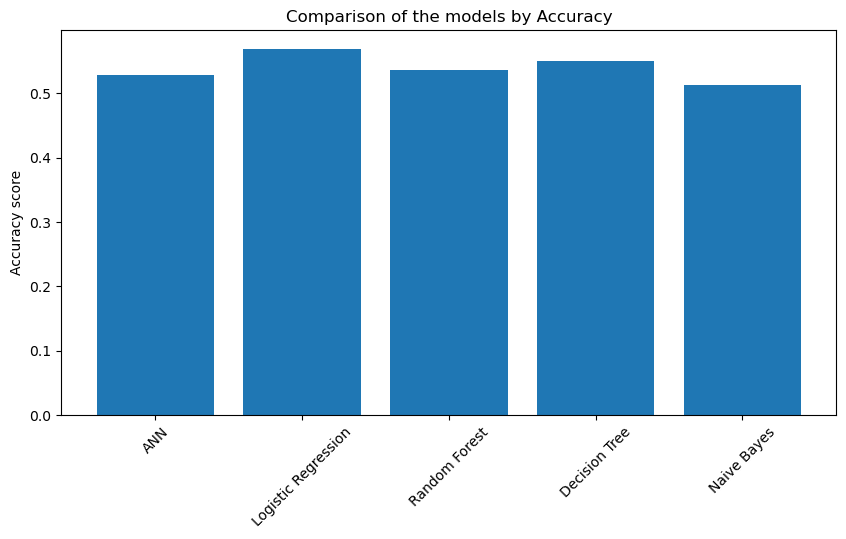

In [105]:
model_results = {
    'ANN': nn_acc,
    'Logistic Regression': logreg_acc,
    'Random Forest': rf_acc,
    'Decision Tree': dt_acc,
    'Naive Bayes': nb_acc
}

plt.figure(figsize=(10,5))
plt.bar(x = model_results.keys(), height=model_results.values())
plt.xticks(rotation=45)
plt.ylabel('Accuracy score')
plt.title("Comparison of the models by Accuracy")

Text(0.5, 1.0, 'Comparison of the models by F1 Score')

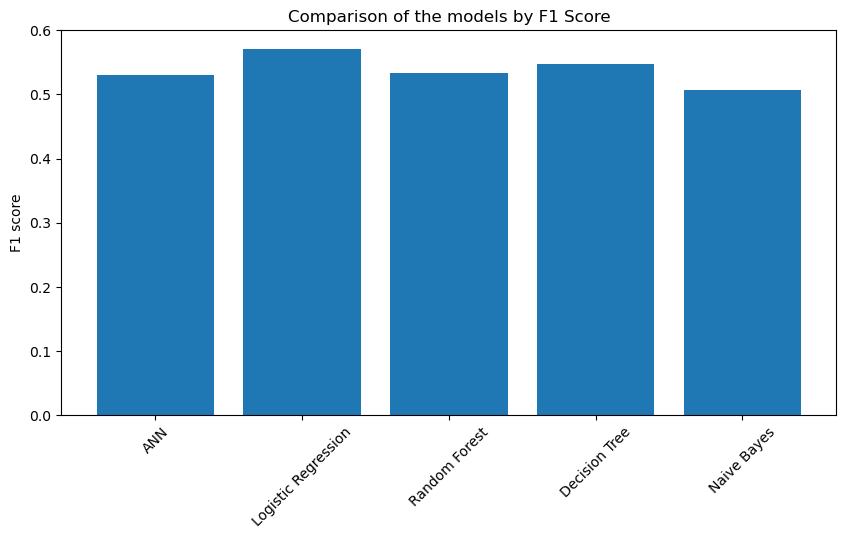

In [103]:
model_f1_results = {
    'ANN': nn_f1,
    'Logistic Regression': logreg_f1,
    'Random Forest': rf_f1,
    'Decision Tree': dt_f1,
    'Naive Bayes': nb_f1
}

plt.figure(figsize=(10,5))
plt.bar(x = model_f1_results.keys(), height=model_f1_results.values())
plt.xticks(rotation=45)
plt.ylabel('F1 score')
plt.title("Comparison of the models by F1 Score")

In [104]:
from functools import reduce
max_key_acc = reduce(lambda x, y: x if model_results[x] > model_results[y] else y, model_results)
max_key_f1 = reduce(lambda x, y: x if model_f1_results[x] > model_f1_results[y] else y, model_f1_results)

print("Model with maximum accuracy:", max_key)
print("Model with maximum f1 score:", max_key_f1)

Model with maximum accuracy: Logistic Regression
Model with maximum f1 score: Logistic Regression


**Therefore we will use Logistic Regression model for our future predictions**

**Evaluation metrics**

In [109]:
try:
    !{sys.executable} -m pip install sklearn --no-cache-dir --quiet
    from sklearn.metrics import classification_report
except Exception as e:
    print(unexpected_error,e)

In [108]:
label_preds = logreg_preds.select('label','prediction').collect()

labels = [row['label'] for row in label_preds]
preds = [row['prediction'] for row in label_preds]

print(classification_report(labels, preds))

              precision    recall  f1-score   support

         0.0       0.45      0.70      0.55        99
         1.0       0.73      0.51      0.60       159
         2.0       0.50      0.22      0.31         9

    accuracy                           0.57       267
   macro avg       0.56      0.48      0.49       267
weighted avg       0.62      0.57      0.57       267



**Our model has 73% of precision in identifying the positive comments (label 1). It's very good because we will use the probability for positive comment in our content-based recommendation algorithm**

### Content-Based Recommendation Process

#### Idea Description:

The recommendation algorithm is designed to provide personalized restaurant recommendations based on users' positive sentiments expressed in reviews and their preferences for certain business categories. The system utilizes a pretrained model to predict the probability of a positive comment for a given review. Recommendations are made by identifying businesses with high positive comment probabilities and similar categories to those the user has expressed interest in.

#### Steps and Architecture:

1. **Preprocessing:**
   - Load the data and handle any missing values.
   - Extract relevant columns: `userID`, `businessID`, `business categories`, `review text`, `business rating`
   - Input the `review text` column into the model and get a new column `probability of positive review`

2. **Filtering:**
   - Filter reviews with positive comment probabilities above a threshold (e.g., 90%).
   - Create a new dataset `recommendable_businesses` of businesses with business rating above a threshold (e.g., 3.5 points)
       - This is done to ensure a good quality of the recommending restaurant. We assume that overall rating of the restaurant is a appropriate value to measure the restaurant's quality.

3. **Recommendation:**
   - The main assumption is that user likes the category he positively reviewed, therefore we recommend the best restaurants in this category.

4. **Future Improvement Suggestions**
   - Use similarity scores like `cosine similarity` to recommend similar businesses.
   - Explore hybrid recommendation models combining content-based and collaborative filtering.

#### Step 1: Preprocessing

In [119]:
# Select needed columns and transform them
cb_recommend = reviews.select('user_indexed','business_indexed','text','name','categories', 'restaurant_stars')
cb_recommend_transformed = preproc_pipeline.transform(cb_recommend).select('user_indexed', 'business_indexed', 'name', 'categories','restaurant_stars', 'features')

24/02/10 19:30:41 WARN StringIndexerModel: Input column sentiment does not exist during transformation. Skip StringIndexerModel for this column.


In [120]:
# Predict on model
cb_preds = logreg_model.transform(cb_recommend_transformed).select('user_indexed','business_indexed','name','categories','restaurant_stars','probability')

In [121]:
# Create a new column. GetItem(1) since our positive label is 1
from pyspark.ml.functions import vector_to_array
cb_preds = cb_preds.withColumn("probability", vector_to_array("probability"))
cb_preds = cb_preds.withColumn('Probability for positive', col('probability').getItem(1)).drop('probability')

In [122]:
cb_preds.printSchema()

root
 |-- user_indexed: double (nullable = false)
 |-- business_indexed: double (nullable = false)
 |-- name: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- restaurant_stars: double (nullable = true)
 |-- Probability for positive: double (nullable = true)



#### Step 2: Filtering

In [123]:
# Create a recommendable businesses df. Threshold 3.5
recommendable_businesses = cb_preds.groupby('business_indexed', 'name', 'categories') \
    .agg(F.avg('restaurant_stars').alias('avg restaurant stars'))

recommendable_businesses = recommendable_businesses.filter(recommendable_businesses['avg restaurant stars'] > 3.5)

In [124]:
# Df with only positive comments
positive_comment_users = cb_preds.filter(col('Probability for positive') >= 0.9)

#### Step 3: Recommendation

In [125]:
positive_comment_users.show()

+------------+----------------+--------------------+--------------------+----------------+------------------------+
|user_indexed|business_indexed|                name|          categories|restaurant_stars|Probability for positive|
+------------+----------------+--------------------+--------------------+----------------+------------------------+
|      2059.0|           454.0|          Goodburger|Restaurants, Fast...|             3.0|      0.9105471449859674|
|      5018.0|           112.0|The Farm and Fish...|American (New), R...|             4.0|      0.9064477093880078|
|      1653.0|           148.0|              Laurel|French, American ...|             4.5|      0.9035884649382027|
|      1349.0|             4.0|              Penang|Malaysian, Asian ...|             3.5|      0.9262800099333055|
|      1349.0|            58.0|              Sbraga|Restaurants, Amer...|             4.0|      0.9160240043374107|
|      5065.0|            51.0|   Beck's Cajun Cafe|Restaurants, Caju...

**Example recommendation for user 232**

In [126]:
user_number = 232
positive_comment_users.filter(col('user_indexed') == user_number).show(truncate=False)

+------------+----------------+--------+----------------------------------------------------------------------------------------------+----------------+------------------------+
|user_indexed|business_indexed|name    |categories                                                                                    |restaurant_stars|Probability for positive|
+------------+----------------+--------+----------------------------------------------------------------------------------------------+----------------+------------------------+
|232.0       |16.0            |Kanella |Mediterranean, Food, Greek, Restaurants, Breakfast & Brunch                                   |4.5             |0.9633776836393012      |
|232.0       |69.0            |V Street|American (New), Breakfast & Brunch, Vegetarian, Vegan, Bars, Wine Bars, Restaurants, Nightlife|4.5             |0.988756702560693       |
+------------+----------------+--------+----------------------------------------------------------------------

**It seems that user 232 very much liked Greek, Mediterranean food, therefore we will recommend him these restaurants out of recommendable businesses**

In [133]:
visited_restaurants_user = positive_comment_users.filter(col('user_indexed') == user_number).select('business_indexed')

# Filter businesses with categories containing 'Chinese' and 'Pakistani'
user_recommendations = recommendable_businesses.filter((col('categories').like('%Greek%')) | col('categories').like('%Mediterranean%'))

# Exclude visited restaurants
user_recommendations_filtered = user_recommendations.alias('rec') \
    .join(visited_restaurants_user_1.alias('visited'), col('rec.business_indexed') == col('visited.business_indexed'), 'left_anti') \
    .select('rec.*')

In [135]:
user_recommendations_filtered.orderBy(col('avg restaurant stars').desc()) \
                            .select('business_indexed', 'name', 'categories') \
                            .show(truncate=False)

+----------------+----------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|business_indexed|name                        |categories                                                                                                                                                                       |
+----------------+----------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|997.0           |Tony Express                |Food, Food Trucks, Mediterranean, Sandwiches, Restaurants, Burgers, Falafel                                                                                                      |
|70.0            |Spice Finch                 |Breakfast & Brunch, Restaurants, Mediterranean   

**These are the restaurants we will recommend to user 232**

**The restaurants at top are the best rated restaurants with this categories. So we could recommend top 5 restaurants for example.**

# Discussion: Hybrid recommendation.

## Process:

1. **Data Preprocessing:**
   - Begin by loading and preprocessing the dataset, ensuring completeness and relevance.
   - Extract key features including user and business identifiers, categories, review text, user ratings, and business ratings.

2. **Collaborative Filtering with ALS:**
   - Employ Alternating Least Squares (ALS) to model user-item interactions and latent factors.
   - Utilize ALS to predict ratings for user-item pairs, thus identifying potential user preferences.

3. **Content-Based Filtering Approach:**
   - Implement content-based filtering to leverage textual data from reviews.
   - Filter reviews based on positive sentiment probabilities above a predetermined threshold.
   - Curate a list of recommendable businesses based on their ratings.

4. **Hybridization Strategy:**
   - Merge recommendations obtained from collaborative filtering and content-based filtering.
   - Experiment with various hybridization techniques including weighted combinations, switching hybrids, and feature combinations.

5. **Performance Evaluation:**
   - Assess the efficacy of the hybrid recommendation algorithm using established metrics such as precision, recall, and F1-score.
   - Conduct thorough analysis to validate the algorithm's effectiveness in generating accurate and diverse recommendations.

6. **Fine-Tuning and Optimization:**
   - Iterate on the algorithm, fine-tuning parameters, and refining hybridization strategies.
   - Optimize the algorithm to achieve optimal balance between personalization and recommendation accuracy.
  
**Source:**

Hybrid Recommendation System using Python: https://medium.com/@techclaw/hybrid-recommendation-system-using-python-da09f9f63285

# Post Scriptum

## Utilized libraries in this notebook, their description and purpose

### PySpark
- **Description**: PySpark is a Python API for Apache Spark, a fast and general-purpose cluster computing system. It allows us to write Spark applications using Python.
- **Purpose**: PySpark is used for processing large-scale data and performing distributed computing tasks.

### FindSpark
- **Description**: FindSpark is a Python library that makes it easy to locate and use Spark within Python scripts or Jupyter notebooks.
- **Purpose**: It simplifies the process of configuring Spark in Python environments.

### Matplotlib
- **Description**: Matplotlib is a 2D plotting library for Python. It allows us to create static, interactive, and animated visualizations in Python.
- **Purpose**: Matplotlib is widely used for creating graphs, charts, histograms, and other types of visualizations to analyze data.

### Seaborn
- **Description**: Seaborn is a Python visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **Purpose**: Seaborn is particularly useful for visualizing complex datasets and statistical relationships.

### WordCloud
- **Description**: WordCloud is a Python library for creating word clouds, which are visual representations of text data. It allows us to generate word clouds from text by frequency of occurrence.
- **Purpose**: WordCloud is commonly used for visualizing the most frequent words in a text corpus, providing insights into the most significant terms.

### TextBlob
- **Description**: TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks, such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
- **Purpose**: TextBlob simplifies the implementation of NLP tasks, making it accessible and useful for rapid prototyping.

### NLTK (Natural Language Toolkit)
- **Description**: NLTK is a platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet.
- **Purpose**: NLTK is used for text processing and analysis tasks, including tokenization, stemming, tagging, parsing, and semantic reasoning.

### Scikit-learn (sklearn)
- **Description**: Scikit-learn is a machine learning library for Python that provides simple and efficient tools for data mining and data analysis. It features various classification, regression, clustering, and dimensionality reduction algorithms.
- **Purpose**: Scikit-learn is widely used for building and deploying machine learning models. It offers a consistent interface for implementing and evaluating various machine learning algorithms.